In [1]:
try:
    import json
except ImportError:
    import simplejson as json
import tweepy
ACCESS_TOKEN = "354442110-kO801M3Ng1qajgaA04Ob1X8nqOATHU3JbkLxKIoz"
ACCESS_SECRET = "jfvmyGQQ8ApAewLlI5oo5GwUcpqawIh243T6tAstJ6Hro"
CONSUMER_KEY = "OsuOzkWeTgSmweKZ07uGF1GGm"
CONSUMER_SECRET = "e24zvacHX0EuGuJtxblhvpPdBXyy0JzESQqN3niXyAnZVHqBag"
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)


In [3]:
from pymongo import MongoClient
client = MongoClient()
db = client["TTdb"]
TTcol = db.TTcol


keyword = 'เลือกตั้ง OR การเมือง'
# keyword = 'twitter'
for status in tweepy.Cursor(api.search, q=keyword , count=100, lang='th').items(3000):
    with open('twitter_data_th.txt', 'a',encoding='utf-8') as outfile:  
        json.dump(status._json, outfile,ensure_ascii=False)
    
    TTcol.insert(status._json)
    


C:\Users\Asus\myConda\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  del sys.path[0]


In [4]:
# TTcol.drop() 
print(client.list_database_names())
print(db.list_collection_names())

['TTdb', 'admin', 'config', 'local', 'mongodbDataBase1', 'mydb', 'pymongo_test']
['TTcol']


In [5]:
# for x in TTcol.find():
#     print(x) 
#     print("\n\n\n\n\n______________________________________________________________________") 

In [17]:
for x in TTcol.find({},{ "_id":0,"text": 1 }):
    print(json.dumps(x,ensure_ascii=False))
    with open('twitter_data_th_only_content.txt', 'a',encoding='utf-8') as outfile:  
        json.dump(x, outfile,ensure_ascii=False)

{"text": "RT @Burin_ccr: ตามการเมืองมา 20 ปี\nสิ่งที่เปลี่ยนไปมากในการเลือกตั้งครั้งนี้ ที่เห็นชัด อยู่ 2 อย่าง\n1. วันรุ่น วัยทำงานช่วงแรก 18-35 ปี…"}
{"text": "RT @pruetthigon: #Futurista #SaveThanathorn #SaveFWP\n🔻 ช่วงเช้าหาเสียงช่วยผู้สมัคร ส.ส. พรรคอนาคตใหม่ คุณคุณธนากร ชินอุดมพร เบอร์ 17 เขต 10…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @SoUdoubtswhat: ฟังสุนทรพจน์ คนไทยอยากหนีไปตปท.เพราะสังคมที่ดีกว่า แต่ทำไมไทยไม่สร้างสภาพแวดล้อมที่ดีขึ้นมาเอง สร้างเองอยู่เอง ตอนฟังนี้…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นัก

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UTM84_47N: จากข่าวและคอมเม้นข้างล่างนี้ โดนมาก...5555+ มันจริงของพี่เขา การบริหารเวลาเป็นสิ่งสำคัญมากจริงๆนะ \n#เลือกตั้ง2562  #เลือกตั้…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @pran2844: รัฐบาลยิ่งลักษณ์ยางพารากิโลละ 80 แต่พากันเชื่อสุเทพว่าจะได้ 120 เลยมาเป่านกหวีด มาปิดถนน ปิดหีบเลือกตั้งจนรัฐประหาร ราคายางลง…"}
{"text": "RT @VoiceOnlineTH: กราฟิตี้การเมืองของศิลปินจอมวิพากษ์เจ้าเดิม #HEADACHESTENCIL ที่สื่อถึงสิทธิการเลือกตั้งของประชาชน ปรากฎอยู่บนกำแพงในซอย…"}
{"text": "RT @Suharit: ฉันตื่นเต้นกับการเลือกตั้งครั้งนี้มาก แต่การตีกัน โต้

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @redmonkeyworld: #CherprangBNK48\nลุคผู้บริหารอย่างนี้ แถม​ปีนี้มีโอกาศสูงที่ เฌอ จะไม่ลงเลือกตั้ง bnk นั้นเปลี่ยนมาระดมทุนซื้อหุ้นให้ เฌ…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอ

{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อนาคตใหม่ มากถึง 37.8% และสนับสนุนคุณธนาธร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @pran2844: รัฐบาลยิ่งลักษณ์ยางพารากิโลละ 80 แต่พากันเชื่อสุเทพว่าจะได้ 120 เลยมาเป่านกหวีด มาปิดถนน ปิดหีบเลือกตั้งจนรัฐประหาร ราคายางลง…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @tomysunflower27: กลับบ้านที่ตจว.แบบไม่ค่อยมีป้ายอ่ะ พอเห็นรถรีบวิ่งออกไปเป็นคุณลุง 2คนยืนแจกใบปลิวเห็นเราไปขอเขายิ้มเลยถามด้วยว่าฟ้ารัก…"}
{"text": "RT @pran2844: รัฐบาลยิ่งลักษณ์ยางพารากิโลละ 80 แต่พากันเชื่อสุเทพว่าจะได้ 120 เลยมาเป่านกหวีด มาปิดถนน ปิดหีบเลือกตั้งจนรัฐประหาร ราคายางลง…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเ

{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @yingcheep: ทำนายไว้แล้วว่า ช่วงใกล้เลือกตั้ง ตอนข่าวการเมือง ผู้คนสนใจที่พรรคการเมือง #สนช จะเร่งผ่านกฎหมายอย่างรวดเร็ว\n\nเอาเข้าจริงก็เ…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @yingcheep: ทำนายไว้แล้วว่า ช่วงใกล้เลือกตั้ง ตอนข่าวการเมือง ผู้คนสนใจที่พรรคการเมือง #สนช จะเร่งผ่านกฎหมายอย่างรวดเร็ว\n\nเอาเข้าจริงก็เ…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @yingcheep: ทำนายไว้แล้วว่า ช่วงใกล้เลือกตั้ง ตอนข่าวกา

{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @Renuka74965119: หมดยุคการเมืองหาเสียงแบบสาดโคลนใส่ร้ายป้ายสีฝั่งคู่แข่งแล้ว ถึงยุคที่แต่ละพรรคเน้นนโยบายและแสดงวิสัยทัศน์ของความเป็นผู้…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @drballban: สำหรับใครที่ลงทะเบียนเลือกตั้งล่วงหน้า/นอกเขต จะต้องเลือกผู้สมัครจากเขตตาม “ทะเบียนบ้าน” ของเรา เช่น มีทะเบียนบ้านอยู่ใน จ.เ…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลื

{"text": "RT @TonsTweetings: เสรีพิสุทธ์พูดถูก ถ้าประยุทธ์ไม่ลงเลือกตั้งรอบนี้ ไม่ตอบรับการเสนอชื่อให้เป็นนายก ลาออกไปสวยๆ เราคงจะไม่วุ่นวายขนาดนี้…"}
{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อนาคตใหม่ มากถึง 37.8% และสนับสนุนคุณธนาธร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @iLawclub: โค้งสุดท้ายเหยียบมิด!\nเดือนเดียว #สนช สภาแต่งตั้งที่เต็มไปด้วยทหาร ผ่านกฎหมาย 66 ฉบับ\nยอดรวมพุ่ง ผ่านกฎหมายไปแล้ว 412 ฉบับ ยั…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นัก

{"text": "RT @JBsPTAnata: @qxxnii ใกล้วันเลือกตั้งล่ะ เก็บไว้พิจารณาล่ะกัน https://t.co/mOwOsHLrWf"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @sukhontt: @Stars47291525 ในขณะที่กลุ่มเหล่านี้ออกมาแฉ #ธนาธร แต่เด็กที่ยังไม่มีสิทธิ์เลือกตั้งกำลังขอพ่อแม่ให้เลือก #อนาคตใหม่ พร้อมบอก…"}
{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อนาคตใหม่ มากถึง 37.8% และสนับสนุนคุณธนาธร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือ

{"text": "RT @yingcheep: ทำนายไว้แล้วว่า ช่วงใกล้เลือกตั้ง ตอนข่าวการเมือง ผู้คนสนใจที่พรรคการเมือง #สนช จะเร่งผ่านกฎหมายอย่างรวดเร็ว\n\nเอาเข้าจริงก็เ…"}
{"text": "RT @yingcheep: ทำนายไว้แล้วว่า ช่วงใกล้เลือกตั้ง ตอนข่าวการเมือง ผู้คนสนใจที่พรรคการเมือง #สนช จะเร่งผ่านกฎหมายอย่างรวดเร็ว\n\nเอาเข้าจริงก็เ…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @agrumpyreader: ฉัน ตอนหัวร้อนเรื่องการเมืองแล้วเลื่อนมาเจอทวิตรูปหมาชิบะ https://t.co/Cv0o0UodhQ"}
{"text": "RT @TTridoron: @chewygumyumyum @mheepaloh ถ้างานบวชตรงกับวันเลือกตั้งคือต้องเลื่อนวันเลือกตั้งงี้ด้วยใช่มั้ยครับ...😂"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้า

{"text": "RT @Armerss: คนที่ถูกเลือกก็เจ็บไม่แพ้กัน ถ้าจะให้ดีต้องไม่มีตัวเลือกตั้งแต่แรก."}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @5up312ju17o12: ประเทศไทยนี่ก็ไปสุดจริง...ทุกด้านอ่ะ\nการเมือง #เลือกตั้งปี62\nบันเทิง #ลูกทุ่งไอดอล\nศาสนา #อาตมามิจําเป็นต้องสนหีสนแตดใดๆ…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @iiDudes: มึงไม่ได้เบื่อเรื่องการเมืองคับพี่ดี้ แต่กระแสคนรุ่นใหม่เรื่องการเมืองตอนนี้มันขัดใจมึงคับ มึงเลยจีบปากจีบคอโหนกระแสนักร้อง2เ…"}
{"text": "RT @fahfifa2: ปั่น พรบ ก่อนเลือกตั้งจังเลยนะคะ เพื่อความมั่นคงหรือมั่นหน้ามั่นโหนก\nพรบ ไซเบอร์ อ้างซับพอร์ทความมั่นคงของชาติความม

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @DarkangleMUCHI: อันนี้ขอนอกเรื่อง เหตุการณ์นี้มันสะท้อนนะว่าไทยไม่ให้ความสำคัญในการศึกษาจริงๆ ก่อนหน้านี้ก้เลื่อนไปเลื่อนมาเพราะจะชนกับ…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นัก

{"text": "RT @5up312ju17o12: ประเทศไทยนี่ก็ไปสุดจริง...ทุกด้านอ่ะ\nการเมือง #เลือกตั้งปี62\nบันเทิง #ลูกทุ่งไอดอล\nศาสนา #อาตมามิจําเป็นต้องสนหีสนแตดใดๆ…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @learnwlearner: ผู้พิพากษา ชี้หาก พรบ.ไซเบอร์ ผ่าน ละเมิดสิทธิร้ายแรง แค่สงสัย ยึดคอมฯได้ แนะเลือกตั้งแก้ปัญหา #พรบไซเบอร์\nhttps://t.co/…"}
{"text": "RT @thairnee: @salim55555555 คือต้องจัดการเลือกตั้ง กระแสประชาชนท้วงถามต่างชาติก็ถาม บางประเทศบีบทางการค้าเรามาแบบเบาๆด้วยและการเลือกตั้ง…"}
{"text": "RT @LeaderDemocracy: #ย้อนรอยอดีด ม๊อบคนบาบ กปปส. กบฏ ขบวางการเลือกตั้ง \n---\nนกหวีดปิดกั้นไม่ให้มีการเลือกตั้งอาวุธครบมือ..ทหารในกองทัพยืน…"}
{"text": "RT @iiDudes: มึงไม่ได้เบื่อเรื่องการเมืองคับพี่ดี้ แต่กระแสคนรุ่นใหม่

{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @iLawclub: โค้งสุดท้ายเหยียบมิด!\nเดือนเดียว #สนช สภาแต่งตั้งที่เต็มไปด้วยทหาร ผ่านกฎหมาย 66 ฉบับ\nยอดรวมพุ่ง ผ่านกฎหมายไปแล้ว 412 ฉบับ ยั…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @Fah_nanapat: การเมืองคุณอาจไม่ชนะ คุณอาจไม่ได้เป็นนายก แต่วัน

{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @yingcheep: ทำนายไว้แล้วว่า ช่วงใกล้เลือกตั้ง ตอนข่าวการเมือง ผู้คนสนใจที่พรรคการเมือง #สนช จะเร่งผ่านกฎหมายอย่างรวดเร็ว\n\nเอาเข้าจริงก็เ…"}
{"text": "RT @JeenUnderstand: นี่เป็นสิ่งที่เกิดกับเราจริงๆ วันนี้คนที่บอกว่ามาจากพรรคพลังประชารัฐโทรหาเราแล้วพูดแบบนี้ เราตั้งสติได้เลยบันทึกเสียงไ…"}
{"text": "RT @iLawclub: โค้งสุดท้ายเหยียบมิด!\nเดือนเดียว #สนช สภาแต่งตั้งที่เต็มไปด้วยทหาร ผ่านกฎหมาย 66 ฉบับ\nยอดรวมพุ่ง ผ่านกฎหมายไปแล้ว 412 ฉบับ ยั…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: 

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกต

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @knoctua: อยากลองรวมวาทกรรมที่เจอช่วงนี้\n\n- รัฐประหารจำเป็นเพราะนักการเมืองโกง\nไม่จำเป็น เพราะตามระบอบประชาธิปไตย ถ้านักการเมืองโกงต้องใ…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @peoplefighter1: @iLawclub ถ้าร่าง พ.ร.บ.นี้ผ่าน สภาฯ สนช.ในฐานะประชาชนที่ต้องการแสดงความคิดเห็นในโลกออนไลน์ ในโซเชี่ยลมีเดีย ก็คงไม่ต้อ…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง 

{"text": "RT @FDY137: ไม่รู้ว่าเป็นเมืองไทย ถ้าไม่เห็นป้ายเลือกตั้งข้างล่าง https://t.co/y6W44IgBTh"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "มองบนให้กับการเมืองไทย https://t.co/T2uqkyAHpo"}
{"text": "RT @5up312ju17o12: ประเทศไทยนี่ก็ไปสุดจริง...ทุกด้านอ่ะ\nการเมือง #เลือกตั้งปี62\nบันเทิง #ลูกทุ่งไอดอล\nศาสนา #อาตมามิจําเป็นต้องสนหีสนแตดใดๆ…"}
{"text": "RT @pran2844: รัฐบาลยิ่งลักษณ์ยางพารากิโลละ 80 แต่พากันเชื่อสุเทพว่าจะได้ 120 เลยมาเป่านกหวีด มาปิดถนน ปิดหีบเลือกตั้งจนรัฐประหาร ราคายางลง…"}
{"text": "RT @yingcheep: ทำนายไว้แล้วว่า ช่วงใกล้เลือกตั้ง ตอนข่าวการเมือง ผู้คนสนใจที่พรรคการเมือง #สนช จะเร่งผ่านกฎหมายอย่างรวดเร็ว\n\nเอาเข้าจริงก็เ…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้ง

{"text": "RT @JeenUnderstand: นี่เป็นสิ่งที่เกิดกับเราจริงๆ วันนี้คนที่บอกว่ามาจากพรรคพลังประชารัฐโทรหาเราแล้วพูดแบบนี้ เราตั้งสติได้เลยบันทึกเสียงไ…"}
{"text": "RT @DarkangleMUCHI: อันนี้ขอนอกเรื่อง เหตุการณ์นี้มันสะท้อนนะว่าไทยไม่ให้ความสำคัญในการศึกษาจริงๆ ก่อนหน้านี้ก้เลื่อนไปเลื่อนมาเพราะจะชนกับ…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @IM_MadamE: เลือกตั้งล่วงหน้าเปิดหีบ 4 นี่ละ มีกฎว่ากาพรรคไหนก่อนได้เป็นนายกเลยมั้ย เหมือนบัตรคอนอะ แม่จะไปรอที่ Embassy คนแรก ได้เปรียบ…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเล

{"text": "RT @peoplefighter1: @iLawclub ถ้าร่าง พ.ร.บ.นี้ผ่าน สภาฯ สนช.ในฐานะประชาชนที่ต้องการแสดงความคิดเห็นในโลกออนไลน์ ในโซเชี่ยลมีเดีย ก็คงไม่ต้อ…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @iiDudes: มึงไม่ได้เบื่อเรื่องการเมืองคับพี่ดี้ แต่กระแสคนรุ่นใหม่เรื่องการเมืองตอนนี้มันขัดใจมึงคับ มึงเลยจีบปากจีบคอโหนกระแสนักร้อง2เ…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั

{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @iLawclub: โค้งสุดท้ายเหยียบมิด!\nเดือนเดียว #สนช สภาแต่งตั้งที่เต็มไปด้วยทหาร ผ่านกฎหมาย 66 ฉบับ\nยอดรวมพุ่ง ผ่านกฎหมายไปแล้ว 412 ฉบับ ยั…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "กุระก็สวยไป๊! ความเฟียสตอนงานเลือกตั้งดูหมดเกลี้ยงไปเลย เหลือแต่ความงามและโก๊ะ https://t.co/4ni68CDQ3U"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @JeenUnderstand: นี่เป็นสิ่งที่เกิดกับเราจริงๆ วันนี้คนที่บอกว่ามาจากพรรคพลังประชารัฐโทรหาเราแล้วพูดแบบนี้ เราตั้งสติได้เลยบันทึกเสียงไ…"}
{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อน

{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @pran2844: รัฐบาลยิ่งลักษณ์ยางพารากิโลละ 80 แต่พากันเชื่อสุเทพว่าจะได้ 120 เลยมาเป่านกหวีด มาปิดถนน ปิดหีบเลือกตั้งจนรัฐประหาร ราคายางลง…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @iiDudes: มึงไม่ได้เบื่อเรื่องการเมืองคับพี่ดี้ แต่กระแสคนรุ่นใหม่เรื่องการเมืองตอนนี้มันขัดใจมึงคับ มึงเลยจีบปากจีบคอโหนกระแสนักร้อง2เ…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้ง

{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @learnwlearner: ผู้พิพากษา ชี้หาก พรบ.ไซเบอร์ ผ่าน ละเมิดสิทธิร้ายแรง แค่สงสัย ยึดคอมฯได้ แนะเลือกตั้งแก้ปัญหา #พรบไซเบอร์\nhttps://t.co/…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @pran2844: รัฐบาลยิ่งลักษณ์ยางพารากิโลละ 80 แต่พากันเชื่อสุเทพว่าจะได้ 120 เลยมาเป่านกหวีด มาปิดถนน ปิดหีบเลือกตั้งจนรัฐประหาร ราคายางลง…"}
{"text": "RT @JanewitC: #อนาคตใหม่ ในการเลือกตั้งรอบแรก เป็นไปได้หมด จะเป็นรัฐบาล ธนาธรก็มีประสบการณ์การเป็นนักบริหารธุรกิจหลักหลายหมื่นล้านบาท นำธุร…"}
{"text": "RT @pran2844: รัฐบาลยิ่งลักษณ์ยางพารากิโลละ 80 แต่พากันเ

{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อนาคตใหม่ มากถึง 37.8% และสนับสนุนคุณธนาธร…"}
{"text": "RT @5up312ju17o12: ประเทศไทยนี่ก็ไปสุดจริง...ทุกด้านอ่ะ\nการเมือง #เลือกตั้งปี62\nบันเทิง #ลูกทุ่งไอดอล\nศาสนา #อาตมามิจําเป็นต้องสนหีสนแตดใดๆ…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @peoplefighter1: @iLawclub ถ้าร่าง พ.ร.บ.นี้ผ่าน สภาฯ สนช.ในฐานะประชาชนที่ต้องการแสดงความคิดเห็นในโลกออนไลน์ ในโซเชี่ยลมีเดีย ก็คงไม่ต้อ…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @pran2844: รัฐบาลยิ่งลักษณ์ยางพารากิโลละ 80 แต่พากันเชื่อสุเทพว่าจ

{"text": "RT @redmonkeyworld: #CherprangBNK48\nลุคผู้บริหารอย่างนี้ แถม​ปีนี้มีโอกาศสูงที่ เฌอ จะไม่ลงเลือกตั้ง bnk นั้นเปลี่ยนมาระดมทุนซื้อหุ้นให้ เฌ…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อนาคตใหม่ มากถึง 37.8% และสนับสนุนคุณธนาธร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟก

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "เริ่มจะไม่ไหวกับข่าวเลือกตั้ง จะแซะอะไรไปมาอะให้มันได้อะไรอะไม่ชอบวันเลือกมึงก็ไปกาคนที่มึงชอบกันจบ ไม่มีใครเอามีดไ… https://t.co/16qC2KI3xk"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @Exoside614: เอาจริงรุ่นนี้หนักมากอ่ะ \n-โดนเลื่อนสอบไปมา(เพราะเลือกตั้ง)\n-เมื่อวานข่าวเด็กโดดตึก\n-วันนี้มีคนบุกทำร้ายเพราะรร.ขอให้ลดเสีย…"}
{"text": "RT @markpeak: ทหารตัวอย่างที่น่าเคารพนับถือที่สุดคือ บิ๊กจิ๋ว \n\nถึงคาแรกเตอร์แกจะแปลกๆ งงๆ แต่นี่คือ ผบ.ทบ. ที่เป็นนายกเพราะชนะเลือกตั้งมา…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกัน

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อนาคตใหม่ มากถึง 37.8% และสนับสนุนคุณธนาธร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @the10face: บอกได้แค่ว่า ได้ยินพ่อแม่หลายคนคุยกันว่า ลูกมาบอกให้เลือกอนาคตใหม่ และเล่านโยบายให้ฟัง ทั้งๆที่อายุ 12 ปี ยังเลือกตั้งไม่ได้…"}
{"text": "RT @FWPthailand: ด่วน! พรรค #อนาคตใหม่ รับสมัคร #Futurista มาเป็นอาสาสมั

{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @Aquilaniie: เมกาจะเลือกตั้งใหม่แล้ว ทรัมป์ที่ว่าเหี่ยๆถ้าแพ้เลือกตั้งก็กลัลบ้านไปเลี้ยงลูกเลี้ยงหมา ไม่เหมือนลุงแถวนี้ เลือกก็ไม่ได้เลื…"}
{"text": "RT @DarkangleMUCHI: อันนี้ขอนอกเรื่อง เหตุการณ์นี้มันสะท้อนนะว่าไทยไม่ให้ความสำคัญในการศึกษาจริงๆ ก่อนหน้านี้ก้เลื่อนไปเลื่อนมาเพราะจะชนกับ…"}
{"text": "RT @pran2844: รัฐบาลยิ่งลักษณ์ยางพารากิโลละ 80 แต่พากันเชื่อสุเทพว่าจะได้ 120 เลยมาเป่านกหวีด มาปิดถนน ปิดหีบเลือกตั้งจนรัฐประหาร ราคายางลง…"}
{"text": "RT @gymnopefiction: เจ้าพ่อลงเล่นการเมืองมากๆ จะร้องไห้ หล่อ https://t.c

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @knoctua: - พรรคเล็กเลือกไปก็ไม่ชนะ\nไม่ใช่พนันม้านะ เลือกตั้งไม่ได้เลือกเอาชนะเด้อ เค้าให้เลือกตัวแทนความคิด สมมติเราอยากให้กัญชาเสรี เร…"}
{"text": "RT @Pimpakka: ท่ามกลางข่าวคบซ้อนซ่อนเงี่ย.. เงื่อน #ป๊อบปองกุล ข่าวนักเลงสมองกลวงทำลายสนามสอบ #วัดสิงห์ ข่าวนักการเมืองแถ-ลงเลือกตั้ง ข่าวแ…"}
{"text": "RT @TTridoron: @chewygumyumyum @mheepaloh ถ้างานบวชตรงกับวันเลือกตั้งคือต้องเลื่อนวันเลือกตั้งงี้ด้วยใช่มั้ยครับ...😂"}
{"text": "RT @ItsnotP_: วงจรอุบาทว์ ของการเมืองไทย #pat5 #Onet62 #dek62 https://t.co/5jDjm6kGMj"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"

{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @DiamondPhet171: เมื่อป้าส่งมาให้ดู 🤫\n#เลือกตั้งปี62 \n#เลือกตั้ง2562 \n#เลือกตั้งปี2562 \n#เลือกตั้ง \n#เลือกตั้งประเทศไทย2562 https://t.co…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @knoctua: อยากลองรวมวาทกรรมที่เจอช่วงนี้\n\n- รัฐประหา

{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อนาคตใหม่ มากถึง 37.8% และสนับสนุนคุณธนาธร…"}
{"text": "RT @5up312ju17o12: ประเทศไทยนี่ก็ไปสุดจริง...ทุกด้านอ่ะ\nการเมือง #เลือกตั้งปี62\nบันเทิง #ลูกทุ่งไอดอล\nศาสนา #อาตมามิจําเป็นต้องสนหีสนแตดใดๆ…"}
{"text": "RT @5up312ju17o12: ประเทศไทยนี่ก็ไปสุดจริง...ทุกด้านอ่ะ\nการเมือง #เลือกตั้งปี62\nบันเทิง #ลูกทุ่งไอดอล\nศาสนา #อาตมามิจําเป็นต้องสนหีสนแตดใดๆ…"}
{"text": "RT @knoctua: อยากลองรวมวาทกรรมที่เจอช่วงนี้\n\n- รัฐประหารจำเป็นเพราะนักการเมืองโกง\nไม่จำเป็น เพราะตามระบอบประชาธิปไตย ถ้านักการเมืองโกงต้องใ…"}
{"text": "RT @DarkangleMUCHI: อันนี้ขอนอกเรื่อง เหตุการณ์นี้มันสะท้อนนะว่าไทยไม่ให้ความสำคัญในการศึกษาจริงๆ ก่อนหน้านี้ก้เลื่อนไปเลื่อนมาเพราะจะชนกับ…"}
{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อนาคตใหม่ มากถึง 37.8% และสนับสนุนคุณธนาธร…"}
{"text": "RT @Cmiimo: 🎊 SALE 🎊\n\nลดราคากันสุด ๆ \n\nโปสเตอร์ เลือกตั้ง \

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @FDY137: ไม่รู้ว่าเป็นเมืองไทย ถ้าไม่เห็นป้ายเลือกตั้งข้างล่าง https://t.co/y6W44IgBTh"}
{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อนาคตใหม่ มากถึง 37.8% และสนับสนุนคุณธนาธร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @thestandardth: กำนันสุเทพชี้ชัด เลือกตั้งครั้งนี้จะอยู่ข้างประเทศไทย หรือทักษิณ\n#สุเทพ \n#คู่มือเลือกตั้ง62\

{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อนาคตใหม่ มากถึง 37.8% และสนับสนุนคุณธนาธร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @Armerss: คนที่ถูกเลือกก็เจ็บไม่แพ้กัน ถ้าจะให้ดีต้องไม่มีตัวเลือกตั้งแต่แรก."}
{"text": "RT @W9bccNH2Zn2PvWo: \"ตรวจสอบรายชื่อให้ตรงกับคนในทะเบียนบ้าน\"    กลอนสุภาพ\n\n        ๐ ใกล้เลือกตั้ง พึงระวัง ให้ดีดี\nจะมีผี ทะเบียนบ้าน คลา…"}
{"text": "RT @iiDudes: มึงไม่ได้เบื่อเรื่องการเมืองคับพี่ดี้ แต่กระแสคนรุ่นใหม่เรื่องการเมืองตอนนี้มันขัดใจมึงคับ มึงเลยจีบปากจีบคอโ

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "เน็ตหอผมช้ากว่าเลือกตั้งอีก"}
{"text": "RT @FDY137: ไม่รู้ว่าเป็นเมืองไทย ถ้าไม่เห็นป้ายเลือกตั้งข้างล่าง https://t.co/y6W44IgBTh"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะ

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @drballban: สำหรับใครที่ลงทะเบียนเลือกตั้งล่วงหน้า/นอกเขต จะต้องเลือกผู้สมัครจากเขตตาม “ทะเบียนบ้าน” ของเรา เช่น มีทะเบียนบ้านอยู่ใน จ.เ…"}
{"text": "RT @knoctua: อยากลองรวมวาทกรรมที่เจอช่วงนี้\n\n- รัฐประหารจำเป็นเพราะนักการเมืองโกง\nไม่จำเป็น เพราะตามระบอบประชาธิปไตย ถ้านักการเมืองโกงต้องใ…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือก

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @sirotek: ดูผมคุยเรื่อง \"ยุทธศาสตร์การเมือง 62\" กับ อ.เจษฎ์และจอมขวัญในรายการถามตรงๆ กับจอมขวัญครับ ฟังผมพูดเรื่องการยุบพรรค, อนาคตการเ…"}
{"text": "RT @themangozero: มี RoadShow ที่กทม สงขลา ขอนแก่น เชียงใหม่ ระยอง\nความพิเศษนอกจากนั้นคือ งานแรกที่กรุงเทพฯ จะมีของ Official ใหม่ขายด้วย ก็…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อนาคตใหม่ มากถึง 37.8% และสนับสนุนคุณธนาธร…"}
{"text": "RT @TonsTweetings: เสรีพิสุทธ์พูดถูก ถ้าประยุทธ์ไม่ลงเลือกตั้งรอบนี้ ไม่ตอบรับการเสนอชื่อให้เป็นนายก ลาออกไปสวยๆ เราคงจะไม่วุ่นวายขนาดนี้…"}
{"text": "RT @the10face: บอกได้แค่ว่า ได้ยินพ่อแม่หลายคนคุยกันว่า ลูกมาบอกให้เลือก

{"text": "RT @knoctua: อยากลองรวมวาทกรรมที่เจอช่วงนี้\n\n- รัฐประหารจำเป็นเพราะนักการเมืองโกง\nไม่จำเป็น เพราะตามระบอบประชาธิปไตย ถ้านักการเมืองโกงต้องใ…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @learnwlearner: ผู้พิพากษา ชี้หาก พรบ.ไซเบอร์ ผ่าน ละเมิดสิทธิร้ายแรง แค่สงสัย ยึดคอมฯได้ แนะเลือกตั้งแก้ปัญหา #พรบไซเบอร์\nhttps://t.co/…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @Exoside614: เอาจริงรุ่นนี้หนักมากอ่ะ \n-โดนเลื่อนสอบไปมา(เพราะเลือกต

{"text": "RT @markpeak: ทหารตัวอย่างที่น่าเคารพนับถือที่สุดคือ บิ๊กจิ๋ว \n\nถึงคาแรกเตอร์แกจะแปลกๆ งงๆ แต่นี่คือ ผบ.ทบ. ที่เป็นนายกเพราะชนะเลือกตั้งมา…"}
{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อนาคตใหม่ มากถึง 37.8% และสนับสนุนคุณธนาธร…"}
{"text": "RT @FDY137: ไม่รู้ว่าเป็นเมืองไทย ถ้าไม่เห็นป้ายเลือกตั้งข้างล่าง https://t.co/y6W44IgBTh"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @TTridoron: @chewygumyumyum @mheepaloh ถ้างานบวชตรงกับวันเลือกตั้งคือต้องเลื่อนวันเลือกตั้งงี้ด้วยใช่มั้ยครับ...😂"}
{"text": "RT @drballban: สำหรับใครที่ลงทะเบียนเลือกตั้งล่วงหน้า/นอกเขต จะต้องเลือกผู้สมัครจากเขตตาม “ทะเบียนบ้าน” ของเรา เช่น มีทะเบียนบ้านอยู่ใน จ.เ…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิง

{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @DarkangleMUCHI: อันนี้ขอนอกเรื่อง เหตุการณ์นี้มันสะท้อนนะว่าไทยไม่ให้ความสำคัญในการศึกษาจริงๆ ก่อนหน้านี้ก้เลื่อนไปเลื่อนมาเพราะจะชนกับ…"}
{"text": "RT @FDY137: ไม่รู้ว่าเป็นเมืองไทย ถ้าไม่เห็นป้ายเลือกตั้งข้างล่าง https://t.co/y6W44IgBTh"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @5up312ju17o12: ประเทศไทยนี่ก็ไปสุดจริง...ทุกด้านอ่ะ\nการเมือง #เลือกตั้งปี62\nบันเทิง #ลูกทุ่งไอดอล\nศาสนา #อาตมามิจําเ

{"text": "RT @iiDudes: มึงไม่ได้เบื่อเรื่องการเมืองคับพี่ดี้ แต่กระแสคนรุ่นใหม่เรื่องการเมืองตอนนี้มันขัดใจมึงคับ มึงเลยจีบปากจีบคอโหนกระแสนักร้อง2เ…"}
{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อนาคตใหม่ มากถึง 37.8% และสนับสนุนคุณธนาธร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @pran2844: รัฐบาลยิ่งลักษณ์ยางพารากิโลละ 80 แต่พากันเชื่อสุเทพว่าจะได้ 120 เลยมาเป่านกหวีด มาปิดถนน ปิดหีบเลือกตั้งจนรัฐประหาร ราคายางลง…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @DarkangleMUCHI: อันนี้ขอนอกเรื่อง เหตุการณ์นี้มันสะท้อนนะว่าไทยไม่ให้

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อนาคตใหม่ มากถึง 37.8% และสนับสนุนคุณธนาธร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @Petitfloppydisc: ธนาธรคือแสดงทัศนคติได้ตรงใจกับเราทุกเรื่อง ตั้งแต่เรื่องการเมือง,ศาสนา,การศึกษา,การพัฒนาประเทศเป็นคนที่มองโลกเป็นเหตุเ…"}
{"text": "RT @learnwlearner: ผู้พิพากษา ชี้หาก พรบ.ไซเบอร์ ผ่าน ละเมิดสิทธิร้ายแรง แค่สงสัย ยึดคอมฯได้ แนะเลือกตั้งแก้ปัญหา #พรบไซเบอร์\nhttps://t.co/…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @ThaiPBS: #10วัน1000นาที ชี้อนาคตประเทศไทย : มองอนาคตไทยหลังเลือกตั้

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @Q_cupid: ใครยังไม่เคยดู แล้วชอบเกี่ยวกับประวัติศาสตร์อังกฤษ ควีนอลิซาเบธที่2 การเมืองอังกฤษ นายกวินสตัน เชอร์ชิล,บุคคลสำคัญetc. การวาง…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @ThaiPBSNews: Q : หลังเลือกตั้ง ประเทศไทยจะดีขึ้นหรือไม่ ? \n\nA : นายสุวัจน์ ลิปตพัลลภ ประธานที่ปรึกษาพรรคชาติพัฒนา เชื่อว่า หลังเลือกจสถ…"}
{"text": "RT @FDY137: ไม่รู้ว่าเป็นเมืองไทย ถ้าไม่เห็นป้ายเลือกตั้งข้างล่าง https://t.co/y6W44IgBTh"}
{"text": "RT @JeenUnderstand: นี่เป็นสิ่งที่เกิดกับเราจริงๆ วันนี้คนที่บอกว่ามาจากพรรคพลังประชารัฐโทรหาเราแล้วพูดแบบนี้ เราตั้งสติได

{"text": "RT @Exoside614: เอาจริงรุ่นนี้หนักมากอ่ะ \n-โดนเลื่อนสอบไปมา(เพราะเลือกตั้ง)\n-เมื่อวานข่าวเด็กโดดตึก\n-วันนี้มีคนบุกทำร้ายเพราะรร.ขอให้ลดเสีย…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "สนช.ก็เหี้นเกิ้นอีควาย ปกติช่วงใกล้เลือกตั้งต้องหยุดพิจารณากฎหมายต่างๆ ได้แล้วเพื่อความโปร่งใส นี่ไม่จ้า กูอนุมัติกันสนุกสนานเลย"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งร

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @FDY137: ไม่รู้ว่าเป็นเมืองไทย ถ้าไม่เห็นป้ายเลือกตั้งข้างล่าง https://t.co/y6W44IgBTh"}
{"text": "RT @themangozero: มี RoadShow ที่กทม สงขลา ขอนแก่น เชียงใหม่ ระยอง\nความพิเศษนอกจากนั้นคือ งานแรกที่กรุงเทพฯ จะมีของ Official ใหม่ขายด้วย ก็…"}
{"text": "RT @iiDudes: มึงไม่ได้เบื่อเรื่องการเมืองคับพี่ดี้ แต่กระแสคนรุ่นใหม่เรื่องการเมืองตอนนี้มันขัดใจมึงคับ มึงเลยจีบปากจีบคอโหนกระแสนักร้อง2เ…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาท

{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @Pimpakka: ท่ามกลางข่าวคบซ้อนซ่อนเงี่ย.. เงื่อน #ป๊อบปองกุล ข่าวนักเลงสมองกลวงทำลายสนามสอบ #วัดสิงห์ ข่าวนักการเมืองแถ-ลงเลือกตั้ง ข่าวแ…"}
{"text": "RT @dadaSadd: ตะกี้เรานั่งอยู่ใต้ถุนบ้าน มีพี่คนนึงมาถามเราว่าอายุถึงเลือกตั้งรึยัง? เราก็บอกถึงแล้ว พี่เค้าก็เอาสมุดมาให้เซ็นชื่อ แล้วบอกจ…"}
{"text": "RT @DarkangleMUCHI: อันนี้ขอนอกเรื่อง เหตุการณ์นี้มันสะท้อนนะว่าไทยไม่ให้ความสำคัญในการศึกษาจริงๆ ก่อนหน้านี้ก้เลื่อนไปเลื่อนมาเพราะจะชนกับ…"}
{"text": "RT @iiDudes: มึงไม่ได้เบื่อเรื่องการเมืองคับพี่ดี้ แต่กระแสคนรุ่นใหม่เรื่องการเมืองตอนนี้มันขัดใจมึงคับ มึงเลยจีบปากจีบคอโหนกระแสนักร้อง2เ…"}
{"text": "RT @learnwlearner: ผู้พิพากษา ชี้หาก พรบ.ไซเบอร์ ผ่าน ละเมิดสิทธิร้ายแรง 

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกต

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @TTridoron: @chewygumyumyum @mheepaloh ถ้างานบวชตรงกับวันเลือกตั้งคือต้องเลื่อนวันเลือกตั้งงี้ด้วยใช่มั้ยครับ...😂"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @FDY137: ไม่รู้ว่าเป็นเมืองไทย ถ้าไม่เห็นป้ายเลือกตั้งข้างล่าง https://t.co/y6W44IgBTh"}

{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @TTridoron: @chewygumyumyum @mheepaloh ถ้างานบวชตรงกับวันเลือกตั้งคือต้องเลื่อนวันเลือกตั้งงี้ด้วยใช่มั้ยครับ...😂"}
{"text": "RT @wirojlak: ที่ห้องเรียน ณ มหาวิทยาลัยแห่งหนึ่ง\n.\nนศ.: เลือกตั้งครั้งนี้ อาจารย์เลือกพรรคไหนคะ\nอ.: ให้ฟ้าลิขิตละกัน\nนศ.: ไม่บอกซะงั้น\nอ.:…"}
{"text": "RT @drballban: บ้านสมเด็จโพลล์ เผยผลสำรวจความคิดชาวกรุงเทพฯ ต่อการเลือกตั้งปี 62 ว่าจะเลือกพรรค #อนาคตใหม่ มากถึง 37.8% และสนับสนุนคุณธนาธร…"}
{"text": "RT @DarkangleMUCHI: อันนี้ขอนอกเรื่อง เหตุการณ์นี้มันสะท้อนนะว่าไทยไม่ให้ความสำคัญในการศึกษาจริงๆ ก่อนหน้านี้ก้เลื่อนไปเลื่อนมาเพราะจะชนกับ…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบันเทิงไทยก็อปเกาหลี นักเลงเข้ามาทำร้ายนักเรียนในร…"}
{"text": "RT @miimeen_: ทุกวันนี้อ่านทล.ในทวิตแล้วก็ได้แต่ขำแห้งๆ ทั้งการเมือง นักร้องสองเมีย วงการบั

{"text": "RT @UUUPPP11: นั่งอยู่Starbucks มีพี่ๆโต๊ะข้างๆนั่งคุยรอกาแฟกันว่าเลือกตั้งรอบนี้จะเลือกใครดี แล้วก็บอกว่าต้องเลือกคนดีไม่โกงกินบ้านบ้านเมื…"}
{"text": "RT @Pimpakka: ท่ามกลางข่าวคบซ้อนซ่อนเงี่ย.. เงื่อน #ป๊อบปองกุล ข่าวนักเลงสมองกลวงทำลายสนามสอบ #วัดสิงห์ ข่าวนักการเมืองแถ-ลงเลือกตั้ง ข่าวแ…"}


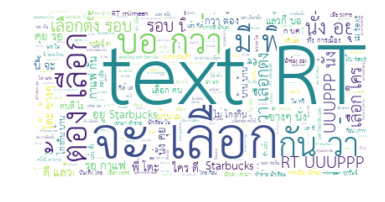

In [5]:
import os
from os import path
import matplotlib.pyplot as plt
from pythainlp.tokenize import word_tokenize
from wordcloud import WordCloud
from pythainlp.corpus import stopwords # ใช้ลบคำที่ไม่ใช้ออก

import io
f = io.open("twitter_data_th_only_content.txt", mode="r", encoding="utf-8")
text = f.read()
f.close()

# f = open('party1.txt',encoding='utf-8')
# text = f.read()
# f.close()

wordcloud = WordCloud(font_path='THSarabunNew.ttf', # path ที่ตั้ง Font
                      stopwords = ' '.join(stopwords.words('thai')), # ลบคำที่ไม่ใช้ออก
                      background_color="white", # ตั้งค่าพืสี้นหลัง
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+" # ป้องกัน bug วรรณยุกต์
                      ).generate(' '.join(word_tokenize(text)))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import os

from os import path
from wordcloud import WordCloud


import io
f = io.open("twitter_data_th_only_content.txt", mode="r", encoding="utf-8")
text = f.read()
# print(text)
wordcloud = WordCloud().generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
image = wordcloud.to_image()
image.show()